In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.corpus import stopwords  # Import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
# -------------------------------
# 1. Load and clean the dataset
# -------------------------------
data = pd.read_csv("combined_data.csv", header=None, 
                   names=["Text", "Label"], delimiter=',', encoding='utf-8')

# Prune the DataFrame to only include rows where 'Label' is "0" or "1"
data = data[data['Label'].isin(['0', '1'])]
data.head()

,Text,Label
1,"Climate change is a crime, a crime against hum...",0
2,That's a pretty simple process. :),0
3,This is truly interesting. Should this technol...,0
4,It's going to be necessary at water treatment ...,0
5,"Oh that’s easy! But first, they must charge an...",0


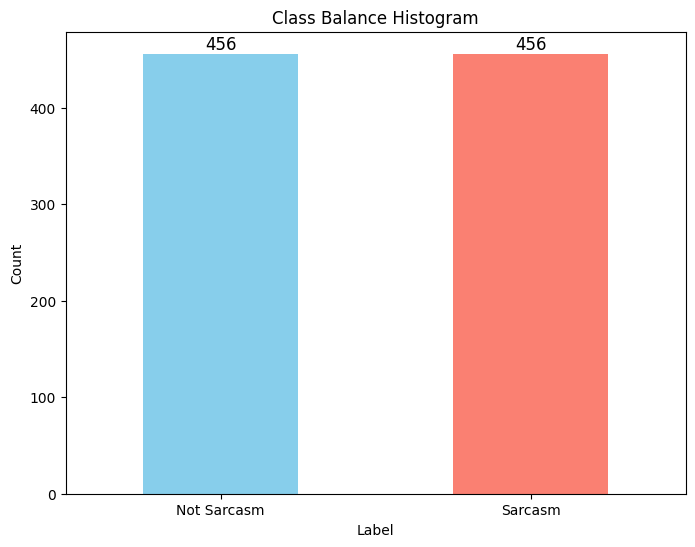

In [120]:

data['Label'] = data['Label'].map({'0': "Not Sarcasm", '1': "Sarcasm"})

plt.figure(figsize=(8, 6))
counts = data['Label'].value_counts()

ax = counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Balance Histogram")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

plt.show()


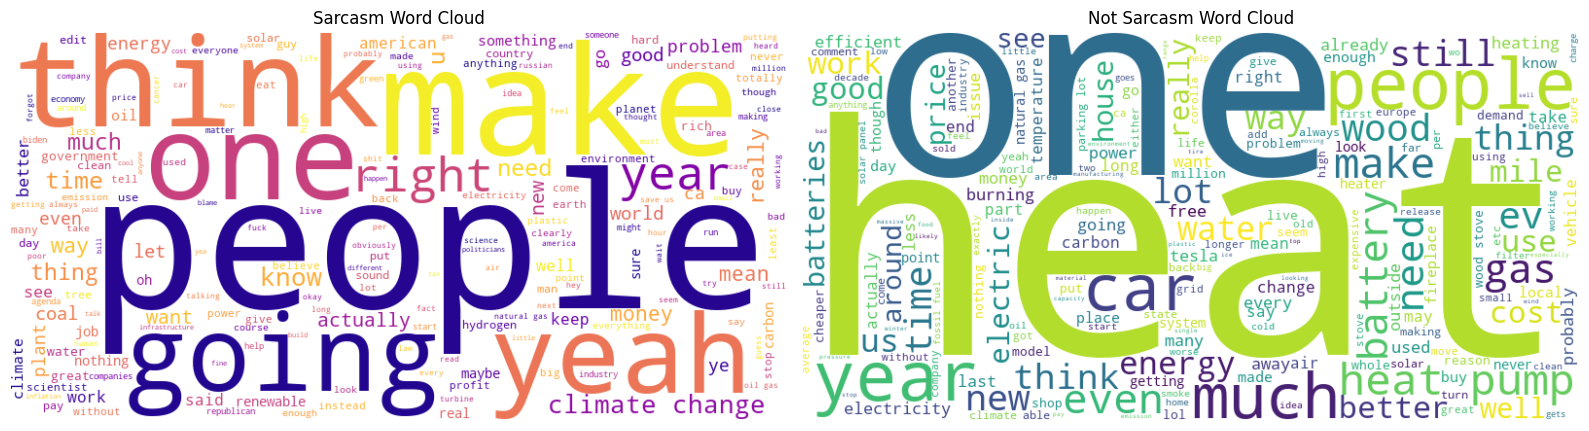

In [121]:

# -------------------------------
# 2. Prepare Text for Word Clouds
# -------------------------------
# Ensure all text entries are strings
data['Text'] = data['Text'].astype(str)

# Concatenate all text for each label
sarcasm_text = " ".join(data[data['Label'] == "Sarcasm"]['Text'])
not_sarcasm_text = " ".join(data[data['Label'] == "Not Sarcasm"]['Text'])

# Tokenize, remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
sarcasm_tokens = [w for w in word_tokenize(sarcasm_text.lower()) if w.isalpha() and w not in stop_words]
not_sarcasm_tokens = [w for w in word_tokenize(not_sarcasm_text.lower()) if w.isalpha() and w not in stop_words]

# Reconstruct the text after cleaning
sarcasm_text = " ".join(sarcasm_tokens)
not_sarcasm_text = " ".join(not_sarcasm_tokens)

# -------------------------------
# 3. Generate Word Clouds
# -------------------------------
wc_sarcasm = WordCloud(
    width=800, 
    height=400,
    background_color='white', 
    colormap='plasma'
).generate(sarcasm_text)

wc_not_sarcasm = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis'
).generate(not_sarcasm_text)

# -------------------------------
# 4. Visualize Word Clouds
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Sarcasm Word Cloud
axes[0].imshow(wc_sarcasm, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Sarcasm Word Cloud")

# Not Sarcasm Word Cloud
axes[1].imshow(wc_not_sarcasm, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Not Sarcasm Word Cloud")

plt.tight_layout()
plt.show()

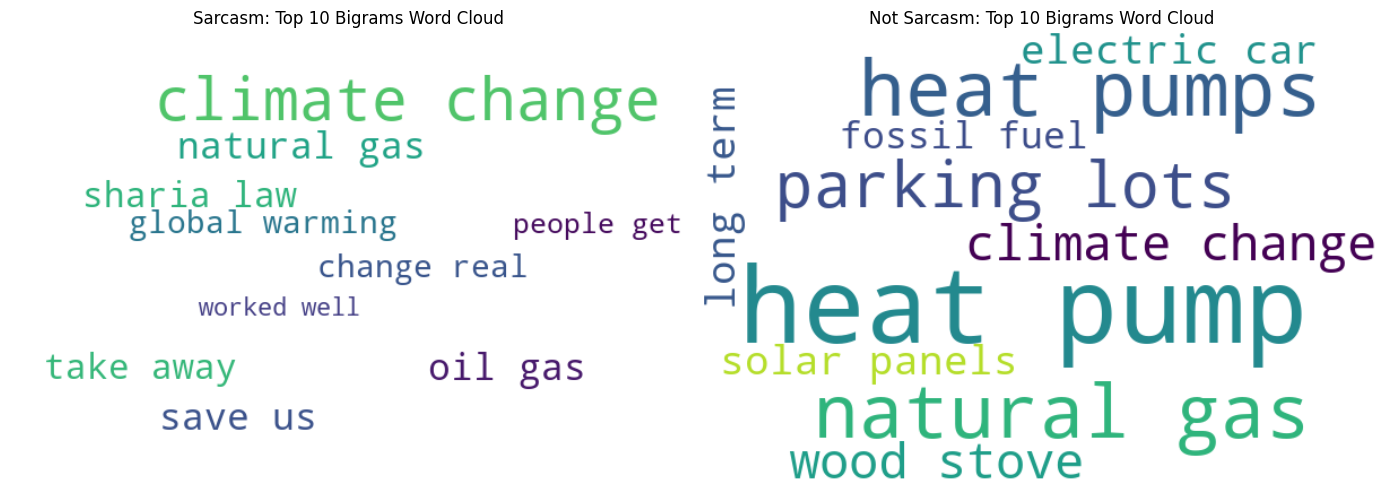

In [122]:


# -----------------------------------
# 1. Extract Top 10 Bigrams (Sarcasm)
# -----------------------------------
finder_sarcasm = BigramCollocationFinder.from_words(sarcasm_tokens)
top10_sarcasm = sorted(
    finder_sarcasm.ngram_fd.items(), 
    key=lambda x: x[1], 
    reverse=True
)[:10]

# ---------------------------------------
# 2. Extract Top 10 Bigrams (Not Sarcasm)
# ---------------------------------------
finder_not = BigramCollocationFinder.from_words(not_sarcasm_tokens)
top10_not = sorted(
    finder_not.ngram_fd.items(), 
    key=lambda x: x[1], 
    reverse=True
)[:10]

# -----------------------------------
# 3. Create Word Clouds
# -----------------------------------
# Convert each bigram (w1, w2) into a single string and build a frequency dict
def make_bigram_freq_dict(bigram_list):
    freq_dict = {}
    for (w1, w2), freq in bigram_list:
        bigram_str = f"{w1} {w2}"  # you can use an underscore if you prefer
        freq_dict[bigram_str] = freq
    return freq_dict

sarcasm_freq_dict = make_bigram_freq_dict(top10_sarcasm)
not_sarcasm_freq_dict = make_bigram_freq_dict(top10_not)

# Generate word clouds from the frequency dictionaries
wc_sarcasm_bigrams = WordCloud(
    width=600,
    height=400,
    background_color='white'
).generate_from_frequencies(sarcasm_freq_dict)

wc_not_sarcasm_bigrams = WordCloud(
    width=600,
    height=400,
    background_color='white'
).generate_from_frequencies(not_sarcasm_freq_dict)

# -----------------------------------
# 4. Visualize Word Clouds Side by Side
# -----------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(wc_sarcasm_bigrams, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Sarcasm: Top 10 Bigrams Word Cloud")

axes[1].imshow(wc_not_sarcasm_bigrams, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Not Sarcasm: Top 10 Bigrams Word Cloud")

plt.tight_layout()
plt.show()
